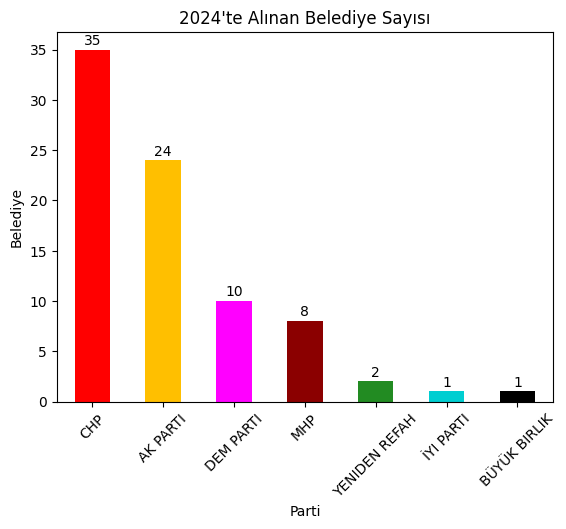

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('secim_data.csv')
filtered_df = df[df['sira'] == 1]
filtered_df = filtered_df[filtered_df['veri'] == "belediye başkanlığı"]

parti_counts = filtered_df['parti'].value_counts()

colors = ['#FF0000', '#FFBF00', '#FF00FF', '#8B0000', '#228B22', '#00CED1', '#000000']

ax = parti_counts.plot(kind='bar', color=colors)

for i, v in enumerate(parti_counts):
    ax.text(i, v + 0.2, str(v), ha='center', va='bottom')

plt.xlabel('Parti')
plt.ylabel('Belediye')
plt.title("2024'te Alınan Belediye Sayısı")

plt.xticks(rotation=45)

plt.show()

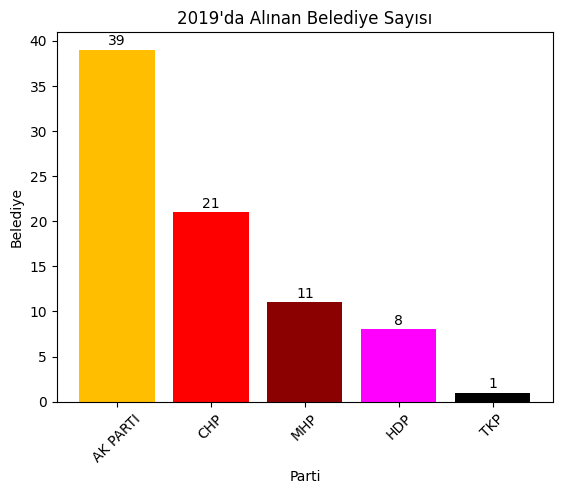

In [22]:
import matplotlib.pyplot as plt

parti_counts = {
    'AK PARTI': 39,
    'CHP': 21,
    'MHP': 11,
    'HDP': 8,
    'TKP': 1

}

colors = ['#FFBF00', '#FF0000', '#8B0000', '#FF00FF', '#000000']

plt.bar(parti_counts.keys(), parti_counts.values(), color=colors)

for i, v in enumerate(parti_counts.values()):
    plt.text(i, v + 0.2, str(v), ha='center', va='bottom')

plt.xlabel('Parti')
plt.ylabel('Belediye')
plt.title("2019'da Alınan Belediye Sayısı")

plt.xticks(rotation=45)

plt.show()

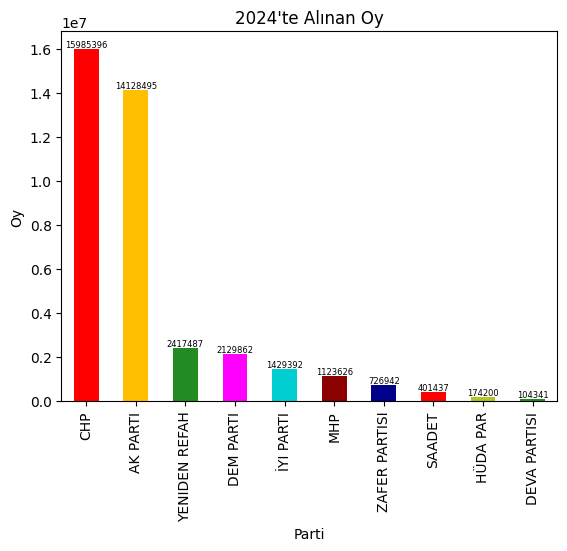

In [36]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('secim_data.csv')

df['oy'] = df['oy'].str.replace('.', '', regex=False)

df['oy'] = pd.to_numeric(df['oy'], errors='coerce')

filtered_df = df[df['veri'] == "belediye başkanlığı"]
grouped_df = filtered_df.groupby('parti')['oy'].sum()

grouped_df = grouped_df.sort_values(ascending=False).head(10)
colors = ['#FF0000', '#FFBF00', '#228B22', '#FF00FF', '#00CED1', '#8B0000', '#00008B', '#FF0000', '#B4C424', '#228B22']
ax = grouped_df.plot(kind='bar', color=colors)

for i, v in enumerate(grouped_df):
    ax.text(i, v + 0.2, int(v), ha='center', va='bottom', fontsize=6)

plt.xlabel('Parti')
plt.ylabel('Oy')
plt.title("2024'te Alınan Oy")

plt.show()


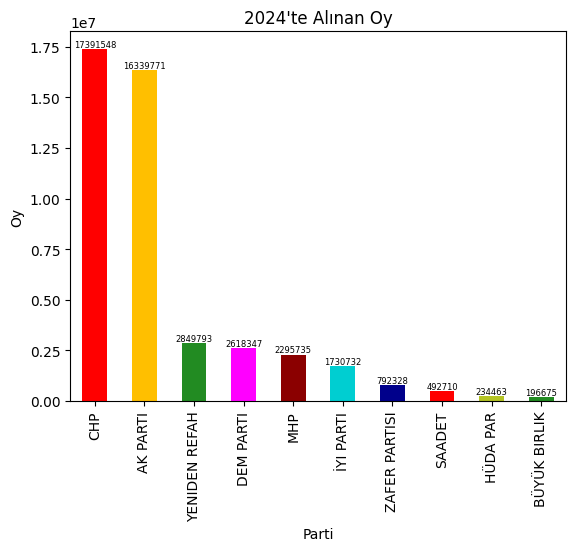

In [35]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('secim_data.csv')

df['oy'] = df['oy'].str.replace('.', '', regex=False)

df['oy'] = pd.to_numeric(df['oy'], errors='coerce')

df1 = df[df['sehir'].str.contains("BÜYÜKŞEHİR") & (df['veri'] == "belediye başkanlığı")]

df2 = df[~df['sehir'].str.contains("BÜYÜKŞEHİR") & (df['veri'] == "il meclisi")]

filtered_df = pd.concat([df1, df2])

grouped_df = filtered_df.groupby('parti')['oy'].sum()

grouped_df = grouped_df.sort_values(ascending=False).head(10)
colors = ['#FF0000', '#FFBF00', '#228B22', '#FF00FF', '#8B0000', '#00CED1', '#00008B', '#FF0000', '#B4C424', '#228B22']
ax = grouped_df.plot(kind='bar', color=colors)

for i, v in enumerate(grouped_df):
    ax.text(i, v + 0.2, int(v), ha='center', va='bottom', fontsize=6)

plt.xlabel('Parti')
plt.ylabel('Oy')
plt.title("2024'te Alınan Oy")

plt.show()

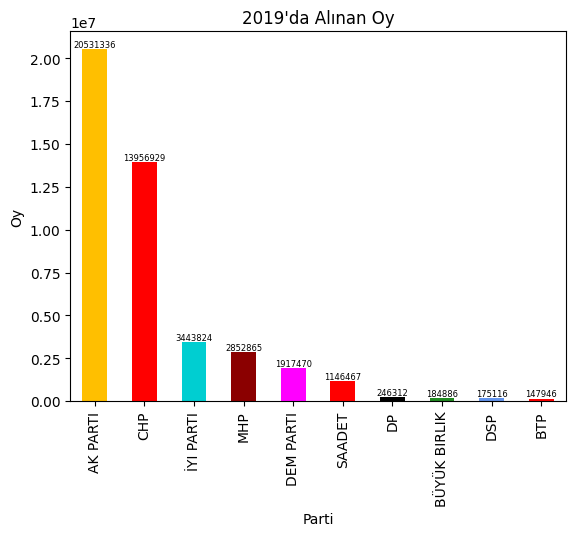

In [38]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('secim_data.csv')

df['oy_2019'] = df['oy_2019'].str.replace('.', '', regex=False)

df['oy_2019'] = pd.to_numeric(df['oy_2019'], errors='coerce')

df1 = df[df['sehir'].str.contains("BÜYÜKŞEHİR") & (df['veri'] == "belediye başkanlığı")]

df2 = df[~df['sehir'].str.contains("BÜYÜKŞEHİR") & (df['veri'] == "il meclisi")]

filtered_df = pd.concat([df1, df2])

grouped_df = filtered_df.groupby('parti')['oy_2019'].sum()

grouped_df = grouped_df.sort_values(ascending=False).head(10)
colors = ['#FFBF00', '#FF0000', '#00CED1', '#8B0000', '#FF00FF', '#FF0000', '#000000', '#228B22', '#6495ED', '#FF0000']
ax = grouped_df.plot(kind='bar', color=colors)

for i, v in enumerate(grouped_df):
    ax.text(i, v + 0.2, int(v), ha='center', va='bottom', fontsize=6)

plt.xlabel('Parti')
plt.ylabel('Oy')
plt.title("2019'da Alınan Oy")

plt.show()

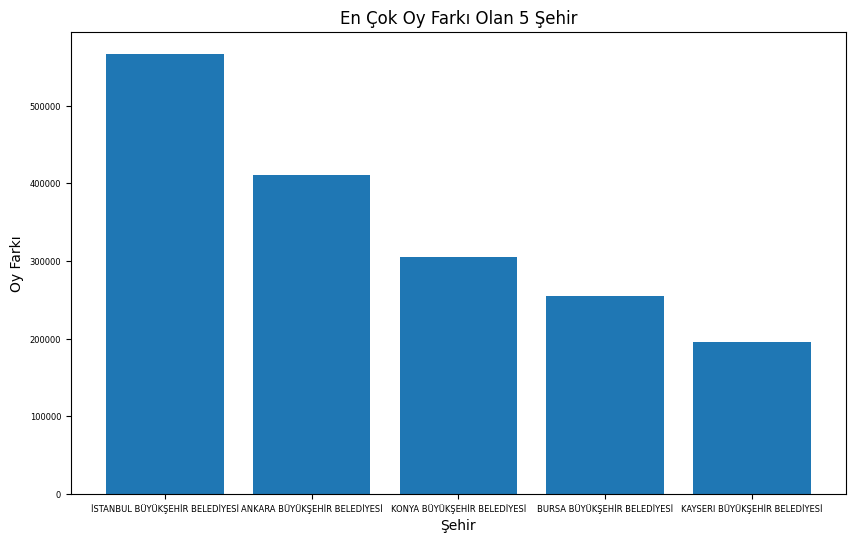

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('secim_data.csv')
df = df[df['veri'] == "il meclisi"]

df['oy'] = df['oy'].str.replace('.', '', regex=False)
df['oy_2019'] = df['oy_2019'].str.replace('.', '', regex=False)

df['oy'] = pd.to_numeric(df['oy'], errors='coerce')
df['oy_2019'] = pd.to_numeric(df['oy_2019'], errors='coerce')

idx = df.groupby('sehir')['oy_2019'].idxmax()
df = df.loc[idx]

df['oy_difference'] = df['oy'] - df['oy_2019']
df['oy_difference_abs'] = df['oy_difference'].abs()

top_5_most_difference = df.nlargest(5, 'oy_difference_abs')['sehir']

top_5_df = df.loc[df['sehir'].isin(top_5_most_difference)]

top_5_df = top_5_df.sort_values(by='oy_difference_abs', ascending=False)

plt.figure(figsize=(10, 6))
plt.bar(top_5_df['sehir'], top_5_df['oy_difference_abs'])
plt.xlabel('Şehir')
plt.ylabel('Oy Farkı')
plt.title('En Çok Oy Farkı Olan 5 Şehir')

plt.tick_params(axis='both', which='major', labelsize=6)

plt.show()

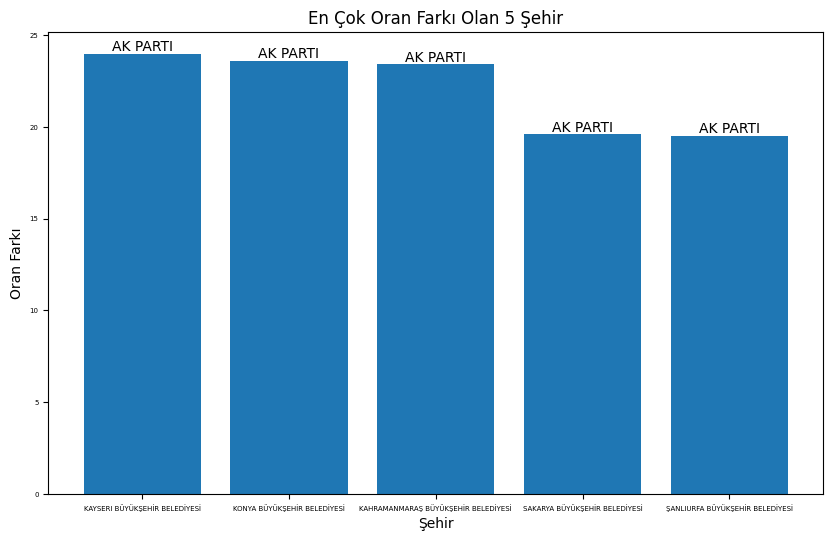

: 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('secim_data.csv')
df = df[df['veri'] == "il meclisi"]

df['oran'] = df['oran'].str.replace('%', '', regex=False)
df['oran_2019'] = df['oran_2019'].str.replace('%', '', regex=False)

df['oran'] = pd.to_numeric(df['oran'], errors='coerce')
df['oran_2019'] = pd.to_numeric(df['oran_2019'], errors='coerce')

idx = df.groupby('sehir')['oran_2019'].idxmax()
df = df.loc[idx]

df['oran_difference'] = df['oran'] - df['oran_2019']
df['oran_difference_abs'] = df['oran_difference'].abs()

top_5_most_difference = df.nlargest(5, 'oran_difference_abs')['sehir']
top_5_least_difference = df.nsmallest(5, 'oran_difference_abs')['sehir']

top_5_df = df.loc[df['sehir'].isin(top_5_most_difference)]

top_5_df = top_5_df.sort_values(by='oran_difference_abs', ascending=False)

plt.figure(figsize=(10, 6))
bars = plt.bar(top_5_df['sehir'], top_5_df['oran_difference_abs'])
plt.xlabel('Şehir')
plt.ylabel('Oran Farkı')
plt.title('En Çok Oran Farkı Olan 5 Şehir')

for bar, parti in zip(bars, top_5_df['parti']):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), parti, 
             ha='center', va='bottom')

plt.tick_params(axis='both', which='major', labelsize=5)
df.to_csv('top_5_df.csv', index=False)

plt.show()

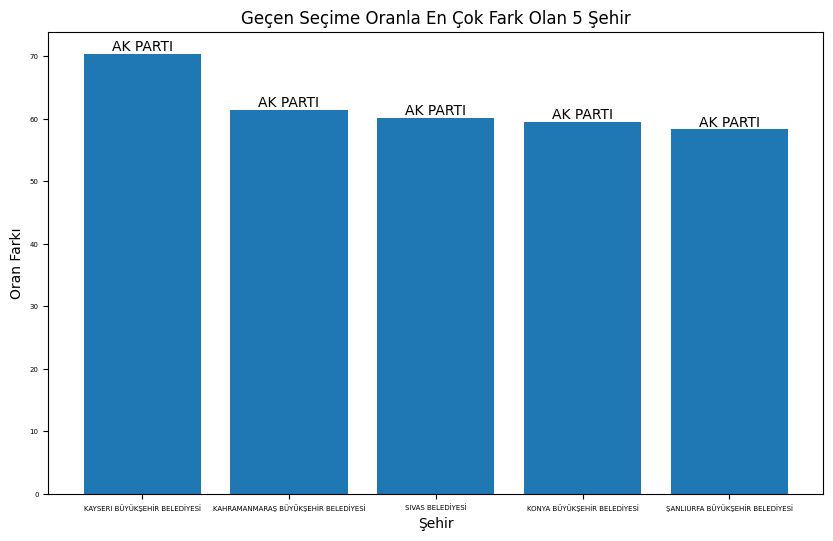

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('secim_data.csv')
df = df[df['veri'] == "il meclisi"]

df['oran'] = df['oran'].str.replace('%', '', regex=False)
df['oran_2019'] = df['oran_2019'].str.replace('%', '', regex=False)

df['oran'] = pd.to_numeric(df['oran'], errors='coerce')
df['oran_2019'] = pd.to_numeric(df['oran_2019'], errors='coerce')

idx = df.groupby('sehir')['oran_2019'].idxmax()
df = df.loc[idx]

df['oran_difference'] = df['oran'] - df['oran_2019']
df['oran_difference_percentage'] = (((df['oran_2019'] - df['oran']) / df['oran']) * 100).abs()

top_5_most_difference = df.nlargest(5, 'oran_difference_percentage')['sehir']

top_5_df = df.loc[df['sehir'].isin(top_5_most_difference)]

top_5_df = top_5_df.sort_values(by='oran_difference_percentage', ascending=False)

plt.figure(figsize=(10, 6))
bars = plt.bar(top_5_df['sehir'], top_5_df['oran_difference_percentage'])
plt.xlabel('Şehir')
plt.ylabel('Oran Farkı')
plt.title('Geçen Seçime Oranla En Çok Fark Olan 5 Şehir')

for bar, parti in zip(bars, top_5_df['parti']):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), parti, 
             ha='center', va='bottom')

plt.tick_params(axis='both', which='major', labelsize=5)
df.to_csv('top_5_df.csv', index=False)

plt.show()

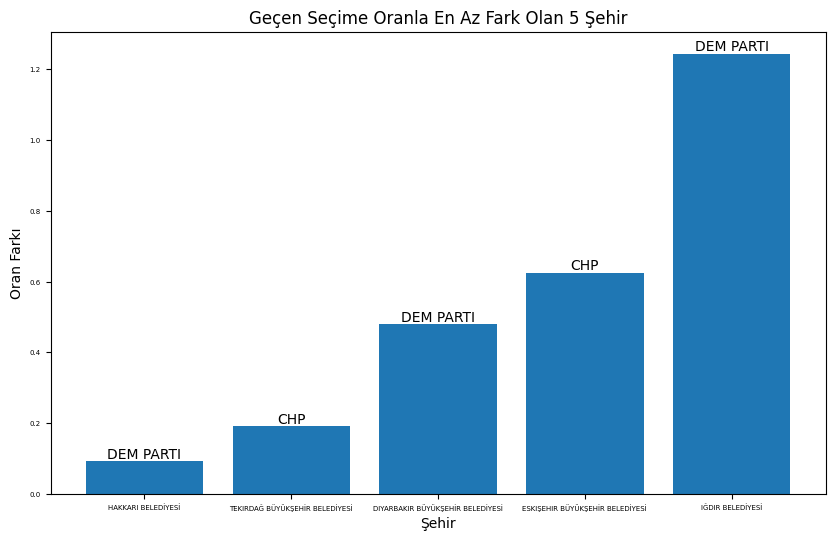

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('secim_data.csv')
df = df[df['veri'] == "il meclisi"]

df['oran'] = df['oran'].str.replace('%', '', regex=False)
df['oran_2019'] = df['oran_2019'].str.replace('%', '', regex=False)

df['oran'] = pd.to_numeric(df['oran'], errors='coerce')
df['oran_2019'] = pd.to_numeric(df['oran_2019'], errors='coerce')

idx = df.groupby('sehir')['oran_2019'].idxmax()
df = df.loc[idx]

df['oran_difference'] = df['oran'] - df['oran_2019']
df['oran_difference_percentage'] = (((df['oran_2019'] - df['oran']) / df['oran']) * 100).abs()

top_5_least_difference = df.nsmallest(5, 'oran_difference_percentage')['sehir']

top_5_df = df.loc[df['sehir'].isin(top_5_least_difference)]

top_5_df = top_5_df.sort_values(by='oran_difference_percentage', ascending=True)

plt.figure(figsize=(10, 6))
bars = plt.bar(top_5_df['sehir'], top_5_df['oran_difference_percentage'])
plt.xlabel('Şehir')
plt.ylabel('Oran Farkı')
plt.title('Geçen Seçime Oranla En Az Fark Olan 5 Şehir')

for bar, parti in zip(bars, top_5_df['parti']):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), parti, 
             ha='center', va='bottom')

plt.tick_params(axis='both', which='major', labelsize=5)
df.to_csv('top_5_df.csv', index=False)

plt.show()

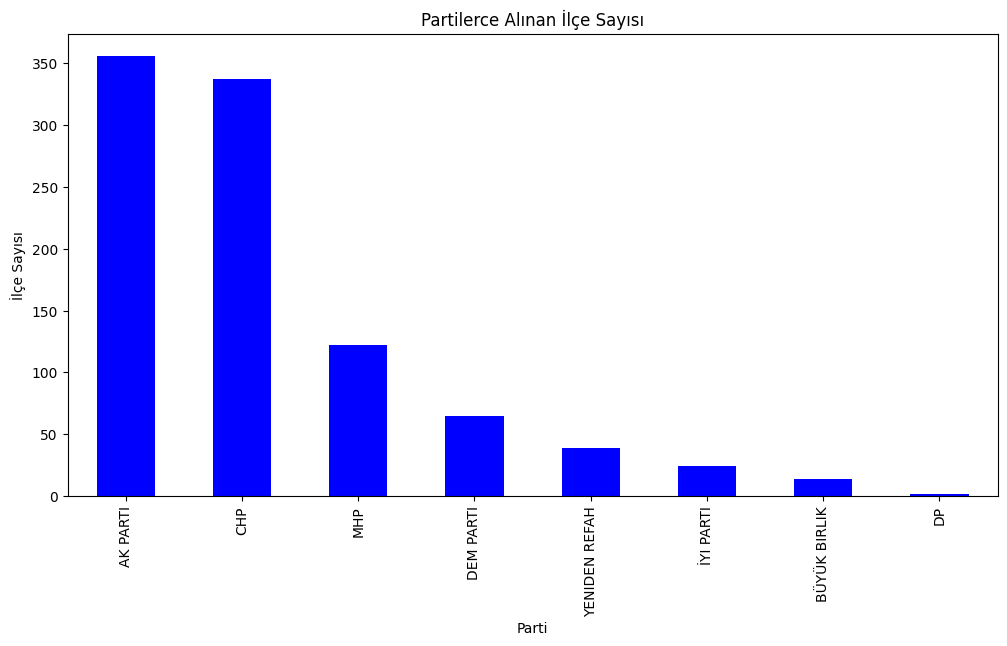

In [54]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('secim_data.csv')

filtered_df = df[df['veri'] == "ilce"]

count_df = filtered_df.groupby('parti').size().reset_index(name='counts')

top_10_df = count_df.sort_values('counts', ascending=False).head(8)

ax = top_10_df.plot(kind='bar', x='parti', y='counts', color='blue', figsize=(12, 6))
legend = ax.legend()
legend.set_visible(False)

plt.title('Partilerce Alınan İlçe Sayısı')
plt.xlabel('Parti')
plt.ylabel('İlçe Sayısı')

plt.show()



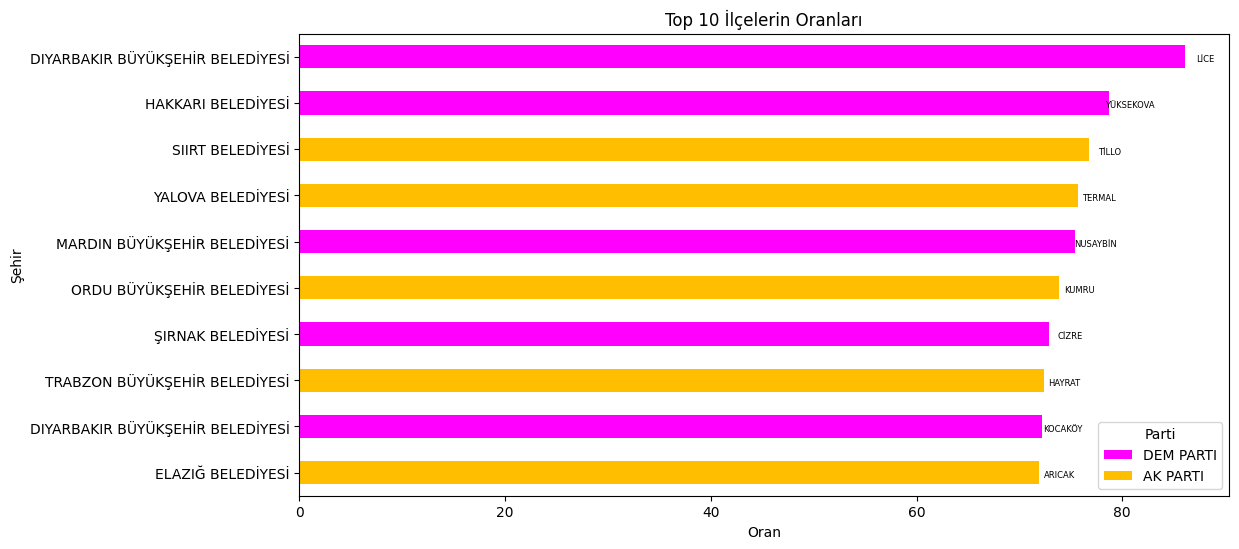

: 

In [94]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

df = pd.read_csv('secim_data.csv')
df['oran'] = pd.to_numeric(df['oran'].str.replace('%', '', regex=False))
filtered_df = df[df['veri'] == "ilce"]

top_10_df = filtered_df.sort_values('oran', ascending=False).head(10)

color_map = {
    'DEM PARTI': '#FF00FF', 
    'AK PARTI': '#FFBF00'
}

ax = top_10_df.plot(kind='barh', x='sehir', y='oran', color=[color_map[parti] for parti in top_10_df['parti']], figsize=(12, 6))

ax.invert_yaxis()

for i, v in enumerate(top_10_df['oran']):
    ax.text(v + 2, i + 0.1, top_10_df['ilce'].iloc[i], ha='center', fontsize=6)

legend_elements = [Patch(facecolor=color_map[parti], label=parti) for parti in color_map.keys()]
ax.legend(handles=legend_elements, title='Parti')

plt.title('Top 10 İlçelerin Oranları')
plt.xlabel('Oran')
plt.ylabel('Şehir')

plt.show()

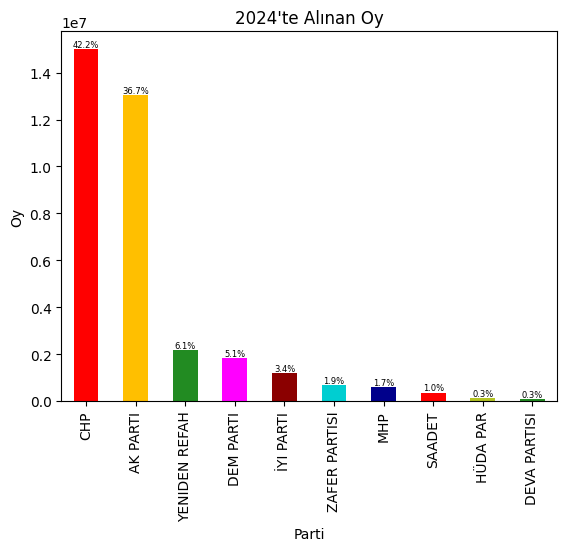

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('secim_data.csv')

df['oy'] = df['oy'].str.replace('.', '', regex=False)
df['oy'] = pd.to_numeric(df['oy'], errors='coerce')

df1 = df[df['sehir'].str.contains("BÜYÜKŞEHİR") & (df['veri'] == "belediye başkanlığı")]
grouped_df = df1.groupby('parti')['oy'].sum()

total_votes = grouped_df.sum()
grouped_df = grouped_df.sort_values(ascending=False).head(10)

colors = ['#FF0000', '#FFBF00', '#228B22', '#FF00FF', '#8B0000', '#00CED1', '#00008B', '#FF0000', '#B4C424', '#228B22']
ax = grouped_df.plot(kind='bar', color=colors)

for i, v in enumerate(grouped_df):
    percentage = v / total_votes * 100
    ax.text(i, v + 0.2, f'{percentage:.1f}%', ha='center', va='bottom', fontsize=6)


plt.xlabel('Parti')
plt.ylabel('Oy')
plt.title("Büyükşehirlerde Oy Dağılımı")

plt.show()

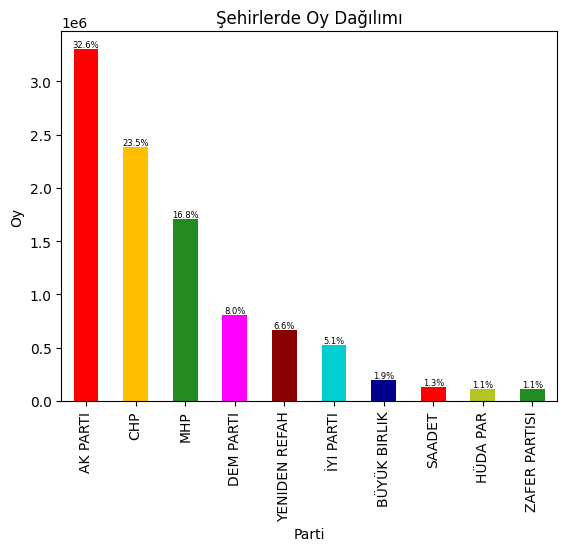

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('secim_data.csv')

df['oy'] = df['oy'].str.replace('.', '', regex=False)
df['oy'] = pd.to_numeric(df['oy'], errors='coerce')

df2 = df[~df['sehir'].str.contains("BÜYÜKŞEHİR") & (df['veri'] == "il meclisi")]
grouped_df = df2.groupby('parti')['oy'].sum()

total_votes = grouped_df.sum()
grouped_df = grouped_df.sort_values(ascending=False).head(10)

colors = ['#FF0000', '#FFBF00', '#228B22', '#FF00FF', '#8B0000', '#00CED1', '#00008B', '#FF0000', '#B4C424', '#228B22']
ax = grouped_df.plot(kind='bar', color=colors)

for i, v in enumerate(grouped_df):
    percentage = v / total_votes * 100
    ax.text(i, v + 0.2, f'{percentage:.1f}%', ha='center', va='bottom', fontsize=6)

plt.xlabel('Parti')
plt.ylabel('Oy')
plt.title("Şehirlerde Oy Dağılımı")

plt.show()